## **Plotting**

Here, we consider that all the networks of interest were already generated and saved. This way, we will augment the networks with extra information
and perform extra calculations to generate data ready for plotting.

Let us consider the two types of networks:<br>
1. **Cities flux networks**<br>
2. **Cities to Hospitals flux networks**<br>

## **-1. Lib**

In [131]:
# -- Bib
import os
import sys
sys.path.append("..")

import networkx as nx
import geopandas as gpd
import pandas as pd
import datetime as dt
import pickle
import glob
import geopandas as gpd
import numpy as np
from shapely.geometry import MultiPolygon, Polygon

import matplotlib
import matplotlib.pyplot as plt

In [2]:
idx = pd.IndexSlice


## **0. Load base data**

In [3]:
# -- base paths
basepath = os.path.join(os.environ["HOMEPATH"], "Documents", "data")
#basepath = os.path.join(os.environ["HOME"], "Documents", "data")
cnespath = os.path.join(basepath, "opendatasus", "cnes")
geopath = os.path.join(basepath, "shapefilesceqgis")
gmlpath = os.path.join(basepath, "redes_aih")
figpath = os.path.join(basepath, "redes_aih", "macrofigs")

## **1. Maps of proposal**

In [4]:
# -- load geo
geodata_df = gpd.read_parquet(os.path.join(geopath, "ce_geodata.parquet"))

In [5]:
border_macro = {"#ef476f":"#ed2c59", "#073b4c":"#04242f", "#118ab2": "#0d6c8c", "#ffb300": "#cc8f00", "#04ae81": "#037d5c"}

**Current Macro**

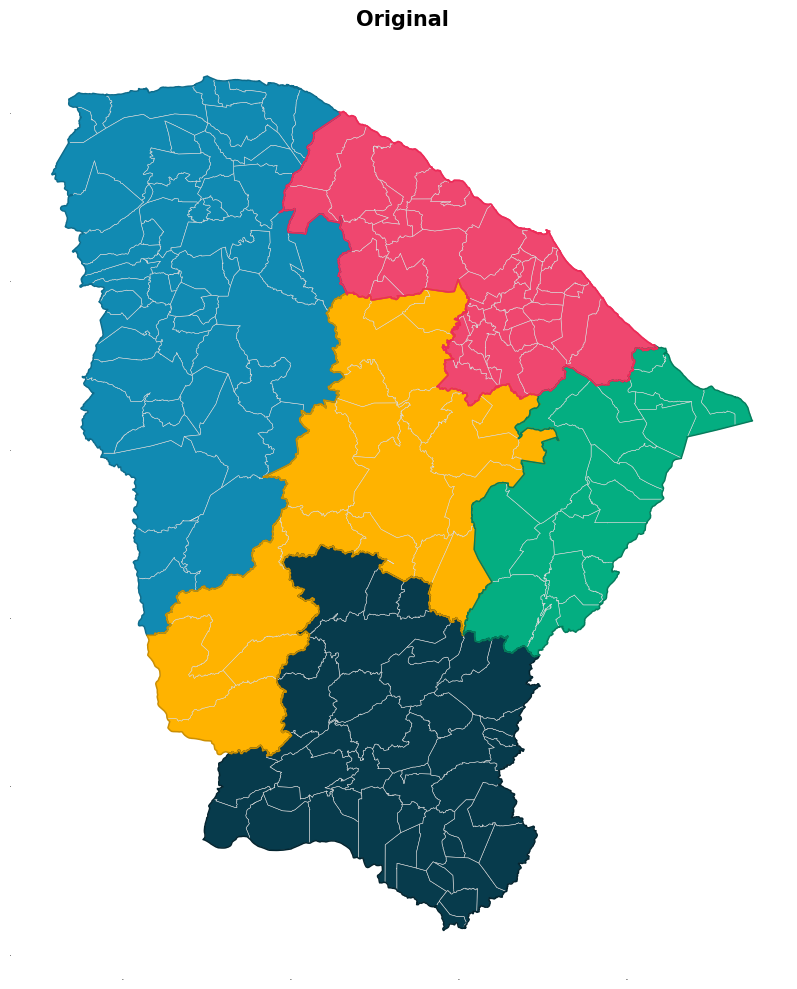

In [178]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.4)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["MACRO_COLOR"], edgecolor="#d9d9d9", linewidth=0.4)

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=AX, color="none", edgecolor=macro_df["MACRO_COLOR"].map(border_macro), linewidth=1.1)
macro_df[macro_df["MACRO_ID"]==1].plot(ax=AX, color="none", edgecolor="#ed2c59", linewidth=1.1)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Original", fontsize=15, weight='bold')

fig_new.tight_layout()
fig_new.savefig(os.path.join(figpath, "original_macro.png"), dpi=250, bbox_inches='tight')

**Proposal**

In [7]:
macro_df

MACRO_ID MACRO_COLOR                                         MACRO_NOME  \
0         5     #073b4c          Superintendência Regional de Saúde Cariri   
1         1     #ef476f       Superintendência Regional de Saúde Fortaleza   
2         4     #118ab2           Superintendência Regional de Saúde Norte   
4         2     #ffb300  Superintendência Regional de Saúde Sertão Central   
7         3     #04ae81   Superintendência Regional de Saúde Litoral Leste   

                                      geometry_macro  
0  POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...  
1  MULTIPOLYGON (((-39.69667 -2.99902, -39.69216 ...  
2  MULTIPOLYGON (((-39.90892 -3.27414, -39.90892 ...  
4  POLYGON ((-40.08511 -6.36860, -40.08445 -6.370...  
7  POLYGON ((-37.77077 -4.42713, -37.76948 -4.426...

In [10]:
proposal_color = {1: "#ef476f", 3: "#073b4c", 6:"#04ae81", 8:"#118ab2", 5: "#ffb300",
                  2: "#bb1190", 4: "#ef7347", 7:"#14b1eb"}

border_proposal_macro = {"#ef476f":"#ed2c59", "#073b4c":"#04242f", "#118ab2": "#0d6c8c", 
                         "#ffb300": "#cc8f00", "#04ae81": "#037d5c", "#14b1eb":"#108ebc",
                         "#bb1190": "#8c0d6c", "#ef7347": "#ed5f2c"}

In [164]:
new_macro_geometry = []
for index in range(1,9):
    new_macro_geometry.append( geodata_df[geodata_df["MACRO_ID_PROPOSAL"]==index]['geometry_municip'].unary_union )
    if index==1:
        new_macro_geometry[-1]  = gpd.GeoSeries([ Polygon(p.exterior) for p in list(new_macro_geometry[-1].geoms) ]).geometry.unary_union
    else:
        new_macro_geometry[-1] = Polygon(new_macro_geometry[-1].exterior)
new_macro_geometry = gpd.GeoDataFrame({'MACRO_ID_PROPOSAL': [ index for index in range(1,9)]}, geometry=new_macro_geometry)

In [171]:
#MultiPolygon(Polygon(p.exterior) for p in list(new_macro_geometry.geometry.iloc[0].geoms)).ext

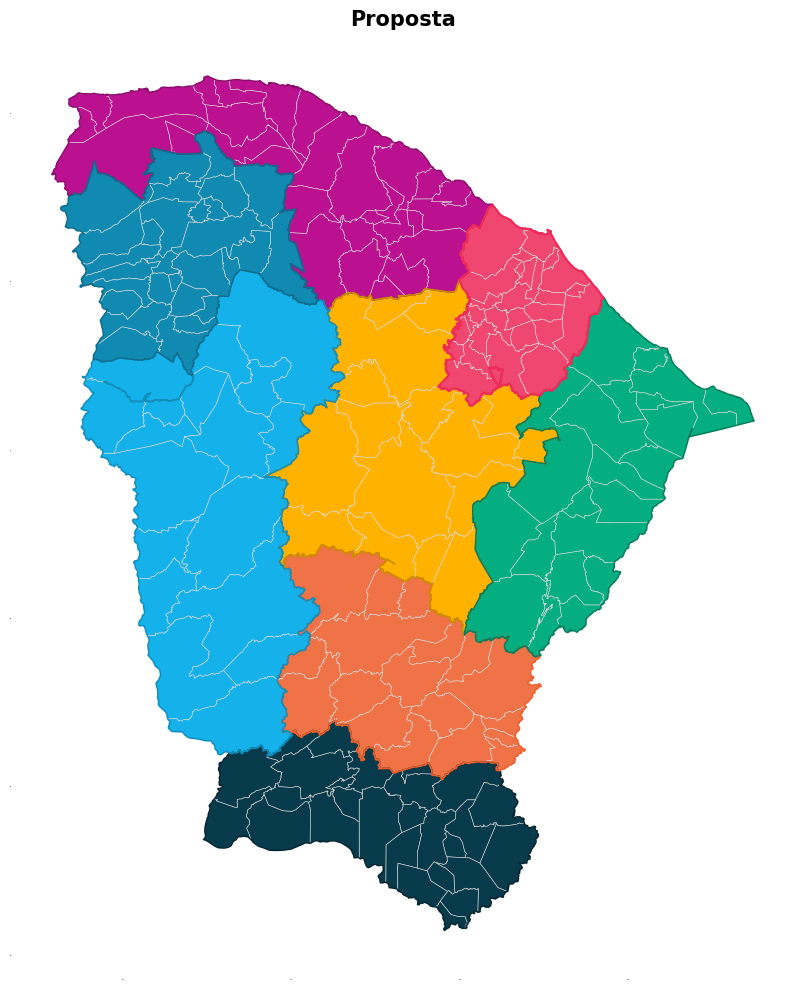

In [179]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

#geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.6)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["MACRO_ID_PROPOSAL"].map(proposal_color), edgecolor="#d9d9d9", linewidth=0.4)

new_macro_geometry.plot(ax=AX, color="none", edgecolor=new_macro_geometry["MACRO_ID_PROPOSAL"].map(proposal_color).map(border_proposal_macro), linewidth=1.1)
new_macro_geometry[new_macro_geometry["MACRO_ID_PROPOSAL"]==1].plot(ax=AX, color="none", edgecolor="#ed2c59", linewidth=1.5)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Proposta", fontsize=15, weight='bold')

fig_new.tight_layout()
fig_new.savefig(os.path.join(figpath, "proposta_macro.png"), dpi=250, bbox_inches='tight')

**Separate macros**

In [191]:
cmap_macro_str = {1: "#ef476f", 2: "#ffd166", 3: "#06d6a0", 4: "#118ab2", 5: "#073b4c"}

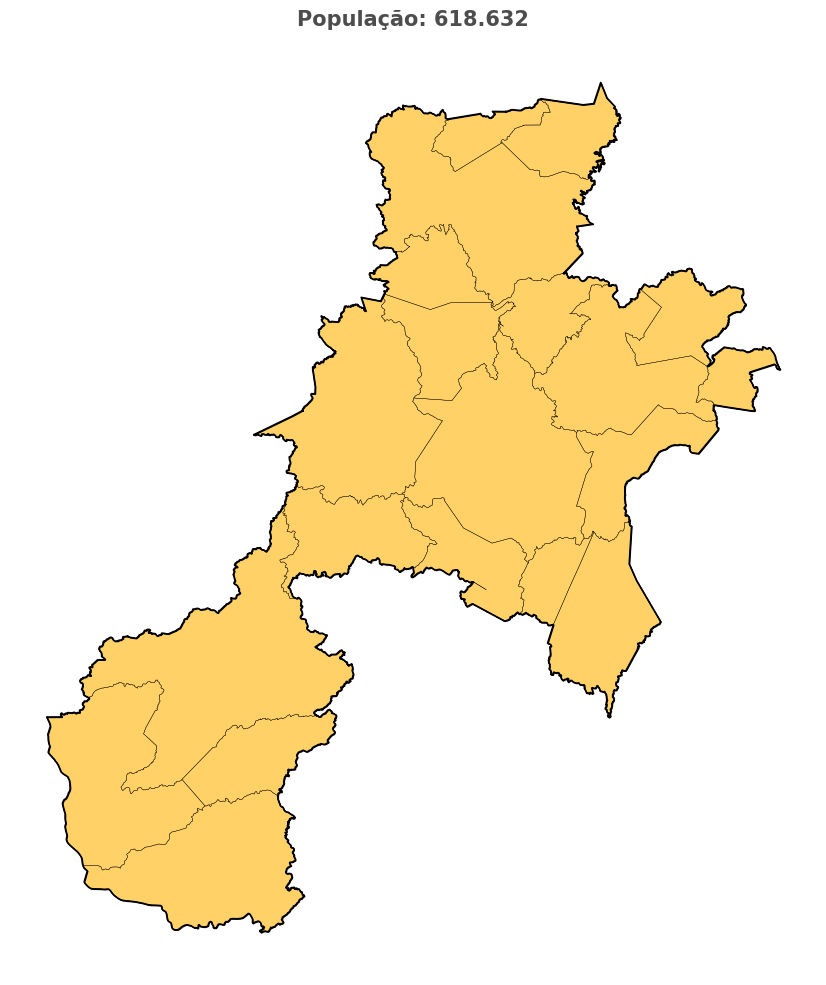

In [190]:
macro_id = 2

def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

def transf_label_macro(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[1]:,}'.replace(",",".")

popn_macro = geodata_df[geodata_df["MACRO_ID"]==macro_id]["2022"].sum()

# -- geometry ceará
fig_mapa, ax_mapa = plt.subplots(1,1, figsize=(15,10))
geodata_df.set_geometry("geometry_municip")

macro_df = geodata_df[["MACRO_ID","2010", "2022"]].groupby("MACRO_ID").sum().reset_index().merge(geodata_df[["geometry_macro", "MACRO_ID"]].drop_duplicates("MACRO_ID"), on="MACRO_ID", how="left")
macro_df = gpd.GeoDataFrame(macro_df).set_geometry("geometry_macro")
macro_df = macro_df[macro_df["MACRO_ID"]==macro_id]
geodata_macro_df = geodata_df[geodata_df["MACRO_ID"]==macro_id]

macro_df.plot(ax=ax_mapa, color=cmap_macro_str[macro_id], edgecolor="#000000")

#macro_df.plot(ax=ax_mapa, column='2010', edgecolor="#000000", 
#             legend=True,
#             scheme="NaturalBreaks",
#             k=6,
#             cmap="PuBu",
#             linewidth=1.0,
#             legend_kwds={
#                 'loc': 4,
#                 'prop': {'size':19},
#                 'markerscale': 1.6,
#                 "fmt": "{:.0f}",
#                 "interval": True
#             },
#             missing_kwds={
#                 "color": "#ffffff",
#                 "edgecolor": "#999999",
#                 "hatch": "///",
#                 "label": '0',
#                 'alpha': 0.5
#             })

geodata_macro_df.plot(ax=ax_mapa, edgecolor="#000000", color='none', linewidth=0.25) 
macro_df.plot(ax=ax_mapa, color='none', edgecolor="#000000", linewidth=1.1) 


ax_mapa.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)

# -- legend macro
#leg = ax_mapa.get_legend()
#lines = leg.get_lines()
#for line in lines:
#    cur_color = line.get_markerfacecolor() 
#    line.set_marker('s')
#    line.set_markersize(18)
#    #line.set_linestyle('-')
#    #line.set_linewidth(12)
#    #line.set_color(cur_color)
#current_labels = [t.get_text() for t in leg.get_texts()]
#new_labels =  [ transf_label_macro(index, label) for index, label in enumerate(current_labels) ]
#ax_mapa.legend(lines, new_labels, prop={'size': 17}, loc=4)

fig_mapa.suptitle(f"População: {popn_macro:,.0f}".replace(",","."), fontsize=15, color="#4d4d4d", weight='bold')
fig_mapa.tight_layout()
fig_mapa.savefig(os.path.join(figpath, f"macro_simples_id{macro_id}.png"), dpi=200, bbox_inches='tight')

## **2. Population, Hospitals**

In [181]:
geodata_df = gpd.read_parquet(os.path.join(geopath, "ce_geodata.parquet"))

### **2.1 City population 2010 and 2022**

c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


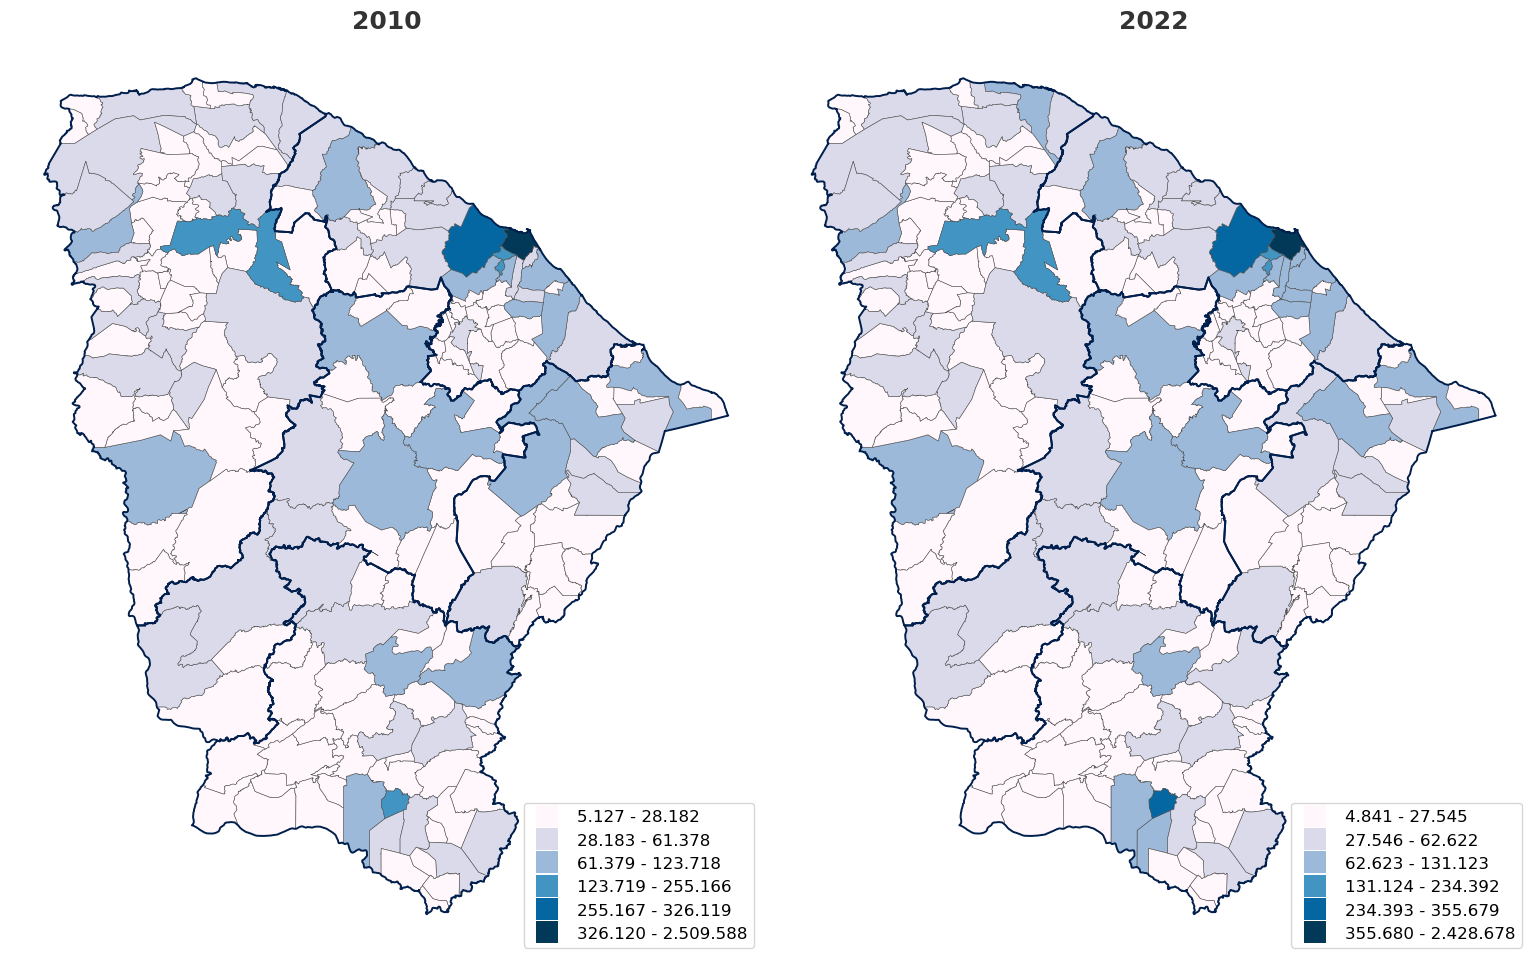

In [182]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, (ax_mapa, ax_mapa2) = plt.subplots(1,2, figsize=(15.5,10))
geodata_df.set_geometry("geometry_municip")

geodata_df.plot(ax=ax_mapa, column='2010', edgecolor="#4d4d4d", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="PuBu",
             linewidth=0.4,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "///",
                 "label": '',
                 'alpha': 0.45
             })

geodata_df.plot(ax=ax_mapa2, column='2022', edgecolor="#4d4d4d", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="PuBu",
             linewidth=0.4,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "///",
                 "label": '',
                 'alpha': 0.45
             })

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax_mapa, color="none", edgecolor="#001f4d", linewidth=1.4)
macro_df.plot(ax=ax_mapa2, color="none", edgecolor="#001f4d", linewidth=1.4)

ax_mapa.axis('off')
ax_mapa2.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)
ax_mapa2.tick_params(which='both', length=0, labelsize=0)

for axis in [ax_mapa, ax_mapa2]:
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(16)
        #line.set_linestyle('-')
        #line.set_linewidth(12)
        #line.set_color(cur_color)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 12}, loc=4)
    #axis.legend(lines, new_labels, prop={'size': 12}, loc=4, title='No. Habitantes', title_fontproperties={'weight': 'bold', 'size': 12})

ax_mapa.set_title("2010", weight='bold', fontsize=18, color="#333333")
ax_mapa2.set_title("2022", weight='bold', fontsize=18, color="#333333")
fig_mapa.tight_layout()
fig_mapa.savefig(os.path.join(figpath, "pop_2010_2022.png"), dpi=200, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_all_mapa_2013_vs_2022.pdf"), dpi=250, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.pdf"), dpi=200, bbox_inches='tight')

### **2.2 Hospitals and hospital beds**

In [183]:
valid_cnes_df = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cnes_com_aih_1801_2306.parquet"))
valid_cnes_df["geometry"] = gpd.points_from_xy(valid_cnes_df.longitude, valid_cnes_df.latitude)
valid_cnes_df = gpd.GeoDataFrame(valid_cnes_df, geometry='geometry')

**Geolocation of health units**

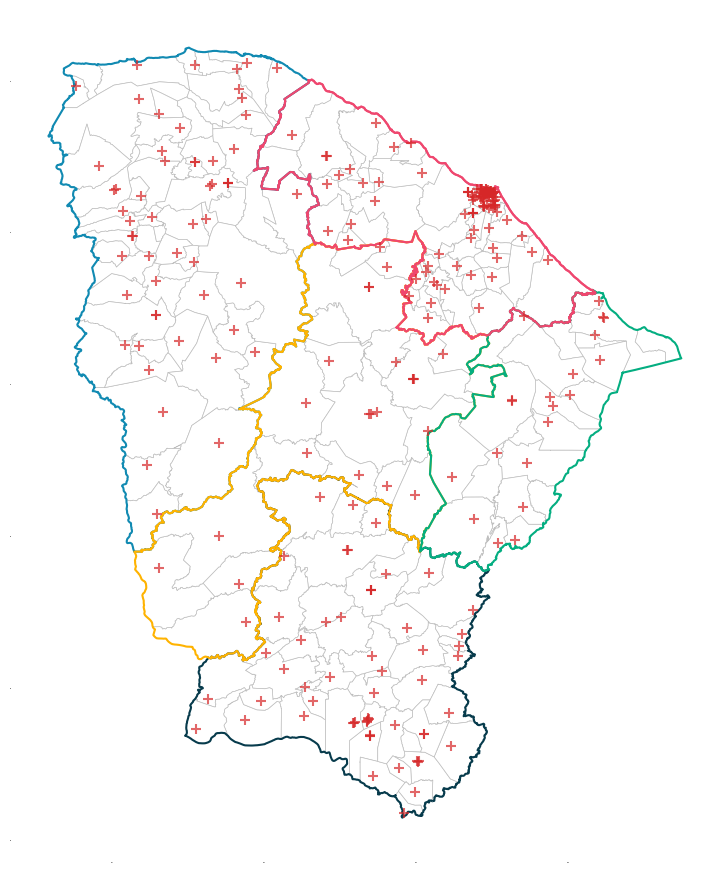

In [184]:
# -- geometry ceará
fig1, ax1 = plt.subplots(1, figsize=(13,11))

geodata_df.plot(ax=ax1, color="#ffffff", edgecolor="#bfbfbf", linewidth=0.5)
macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax1, color="none", edgecolor=macro_df["MACRO_COLOR"], linewidth=1.5)
macro_df[macro_df["MACRO_ID"]==1].plot(ax=ax1, color="none", edgecolor="#ef476f", linewidth=1.5)

valid_cnes_df.plot(ax=ax1, markersize=42, marker='+', alpha=0.7, color="tab:red")

for i in ['left', 'right', 'top', 'bottom']:
    ax1.spines[i].set_linewidth(0)

ax1.tick_params(which='both', length=0, labelsize=0)


# -- node color
cmap_macro_str = {'1': "#ef476f", '2': "#ffd166", '3': "#06d6a0", '4': "#118ab2", '5': "#073b4c"}
cmap_macro_str = {'1': "#ef476f", '2': "#ffb300", '3': "#04ae81", '4': "#118ab2", '5': "#073b4c"}

# -- edge color
cmap_edge_color = {'1': "#ef476f", '2': "#ffd166", '3': "#06d6a0", '4': "#118ab2", '5': "#073b4c", "-1": "#9c9c9c"}
cmap_edge_color = {'1': "#ef476f", '2': "#ffb300", '3': "#04ae81", '4': "#118ab2", '5': "#073b4c", "-1": "#404040"}

fig1.savefig(os.path.join(figpath, "hospitals_2018_2306.png"), dpi=200, bbox_inches='tight')


**Number of hospital beds**

In [ ]:
leitos_muni_df = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "leitos_por_municipio_1801_2306.parquet"))
geodata_df1 = geodata_df.merge(leitos_muni_df, on="GEOCOD6", how="left")

c:\Users\higor.monteiro\AppData\Local\anaconda3\envs\sevig310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


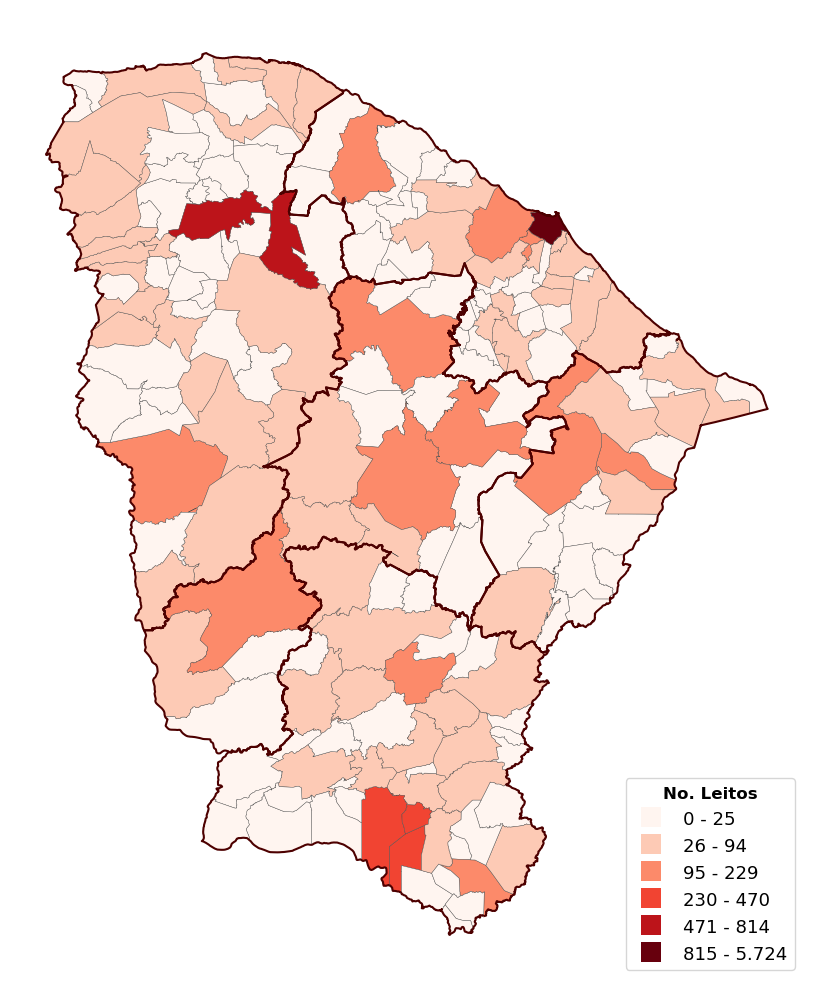

In [ ]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, ax_mapa = plt.subplots(1,1, figsize=(15.5,10))
geodata_df.set_geometry("geometry_municip")

geodata_df1.plot(ax=ax_mapa, column='NUMLEITOS', edgecolor="#4d4d4d", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="Reds",
             linewidth=0.3,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "///",
                 "label": '',
                 'alpha': 0.45
             })

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax_mapa, color="none", edgecolor="#4d0000", linewidth=1.5)


ax_mapa.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)

for axis in [ax_mapa]:
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(15)
        #line.set_linestyle('-')
        #line.set_linewidth(12)
        #line.set_color(cur_color)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 13}, loc=4, title='No. Leitos', title_fontproperties={'weight': 'bold', 'size': 12})

#ax_mapa.set_title("2010", weight='bold', fontsize=18, color="#333333")
fig_mapa.tight_layout()
fig_mapa.savefig(os.path.join(figpath, "mapa_leitos_2306.png"), dpi=200, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_all_mapa_2013_vs_2022.pdf"), dpi=250, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.pdf"), dpi=200, bbox_inches='tight')

**Stats per macro**

In [193]:
geodata_df1 = geodata_df.copy()

In [194]:
macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_ID_PROPOSAL", "MACRO_NOME", "geometry_macro"]]
macro_df["MACRO_NOME"] = macro_df["MACRO_NOME"].apply(lambda x: x.replace("Superintendência Regional de Saúde ", ""))
macro_id_to_nome = dict(zip(macro_df["MACRO_ID"], macro_df["MACRO_NOME"]))

health_units_per_macro = valid_cnes_df["MACRO_ID"].value_counts().reset_index().sort_values(by="MACRO_ID")
leitos_per_macro = geodata_df1.groupby("MACRO_ID")[["NUMLEITOS", "2022"]].sum().reset_index().sort_values(by="MACRO_ID")
leitos_per_macro["POPPLEITO"] = leitos_per_macro["2022"]/leitos_per_macro["NUMLEITOS"]
#pop_per_macro = geodata_df1.groupby("MACRO_ID")["NUMLEITOS"].sum().reset_index().sort_values(by="MACRO_ID")

health_units_per_macro["MACRO_ID"] = health_units_per_macro["MACRO_ID"].map(macro_id_to_nome)
leitos_per_macro["MACRO_ID"] = leitos_per_macro["MACRO_ID"].map(macro_id_to_nome)

KeyError: "Columns not found: 'NUMLEITOS'"

C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_21676\1722843672.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=15)


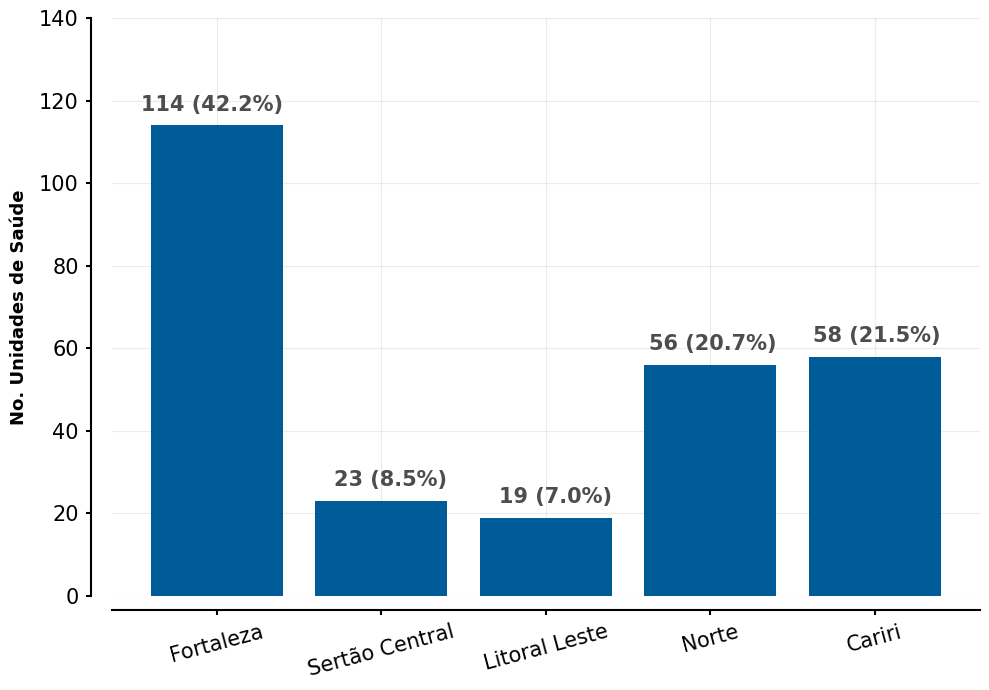

In [14]:
fig, ax = plt.subplots(1, figsize=(10,7.))

for i in ['left', 'right', 'bottom', 'top']:
    ax.spines[i].set_linewidth(1.5)

for axis in [ax]:
    axis.spines['top'].set_linewidth(0)
    axis.spines['right'].set_linewidth(0)
    axis.spines['left'].set_position(('outward', 15))
    axis.spines['bottom'].set_position(('outward', 10))
    axis.grid(alpha=0.25, zorder=0)

    axis.tick_params(direction='out', width=1.5, labelsize=15, pad=5)

ax.bar(health_units_per_macro["MACRO_ID"], health_units_per_macro["count"], zorder=2, color="#005c99")
#ax_sel.bar(raca_count_sel[col_nm], raca_count_sel["count"], zorder=2, color="#005c99")
#ax.barh(idade_ms_fem.index, -1*idade_ms_fem, label="Feminino", zorder=2)

ax.tick_params(direction='out', width=1.5, labelsize=15, pad=5)
#ax.yaxis.set_tick_params(labelsize=15)
#ax.yaxis.set_tick_params(width=0)
ax.set_ylim([0, 140])

ax.grid(alpha=0.25, zorder=0)
for axis in [ax]:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axis.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    axis.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(abs(x)), ',').replace(",", ".")))
#ax.legend(prop={'size':14}, loc=4)

serie_data = health_units_per_macro
serie_sum = serie_data['count'].sum()
for idx in range(len(serie_data['count'])):
    porc = (serie_data['count'].iloc[idx]/serie_sum)*100
    ax.text(y=serie_data['count'].iloc[idx]+5, x=idx+0.4, s=f'{serie_data["count"].iloc[idx]:,} ({porc:.1f}%)', 
                ha='right', va='center', weight='bold', fontsize=15, color="#4d4d4d")
    
ax.set_ylabel("No. Unidades de Saúde", fontsize=13, weight='bold', labelpad=8)
ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=15)
fig.tight_layout()
#ax.set_title("Todos os óbitos", weight='bold', fontsize=15)
fig.savefig(os.path.join(figpath, "stats_macro_original_unidades.png"), dpi=200, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.png"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.pdf"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.pdf"), dpi=200, bbox_inches='tight')

C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_21676\2110293215.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=15)


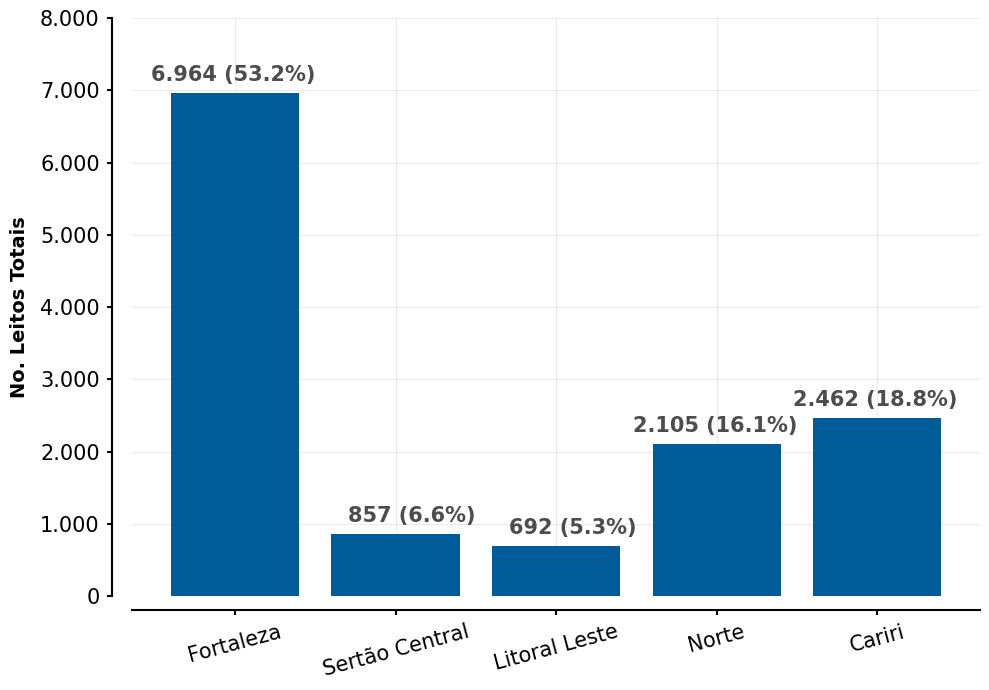

In [15]:
fig, ax = plt.subplots(1, figsize=(10,7.))

for i in ['left', 'right', 'bottom', 'top']:
    ax.spines[i].set_linewidth(1.5)

for axis in [ax]:
    axis.spines['top'].set_linewidth(0)
    axis.spines['right'].set_linewidth(0)
    axis.spines['left'].set_position(('outward', 15))
    axis.spines['bottom'].set_position(('outward', 10))
    axis.grid(alpha=0.25, zorder=0)

    axis.tick_params(direction='out', width=1.5, labelsize=15, pad=5)

ax.bar(leitos_per_macro["MACRO_ID"], leitos_per_macro["NUMLEITOS"], zorder=2, color="#005c99")
#ax_sel.bar(raca_count_sel[col_nm], raca_count_sel["count"], zorder=2, color="#005c99")
#ax.barh(idade_ms_fem.index, -1*idade_ms_fem, label="Feminino", zorder=2)

ax.tick_params(direction='out', width=1.5, labelsize=15, pad=5)
#ax.yaxis.set_tick_params(labelsize=15)
#ax.yaxis.set_tick_params(width=0)
ax.set_ylim([0, 8000])

ax.grid(alpha=0.25, zorder=0)
for axis in [ax]:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axis.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    axis.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(abs(x)), ',').replace(",", ".")))
#ax.legend(prop={'size':14}, loc=4)

serie_data = leitos_per_macro
serie_sum = serie_data['NUMLEITOS'].sum()
for idx in range(len(serie_data['NUMLEITOS'])):
    porc = (serie_data['NUMLEITOS'].iloc[idx]/serie_sum)*100
    ax.text(y=serie_data['NUMLEITOS'].iloc[idx]+250, x=idx+.5, s=f'{serie_data["NUMLEITOS"].iloc[idx]:,.0f} ({porc:.1f}%)'.replace(",","."), 
                ha='right', va='center', weight='bold', fontsize=15, color="#4d4d4d")
    
ax.set_ylabel("No. Leitos Totais", fontsize=14, weight='bold', labelpad=8)
ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=15)
fig.tight_layout()
#ax.set_title("Todos os óbitos", weight='bold', fontsize=15)
fig.savefig(os.path.join(figpath, "stats_macro_original_leitos.png"), dpi=200, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.png"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.pdf"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.pdf"), dpi=200, bbox_inches='tight')

C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_21676\1143101723.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=15)


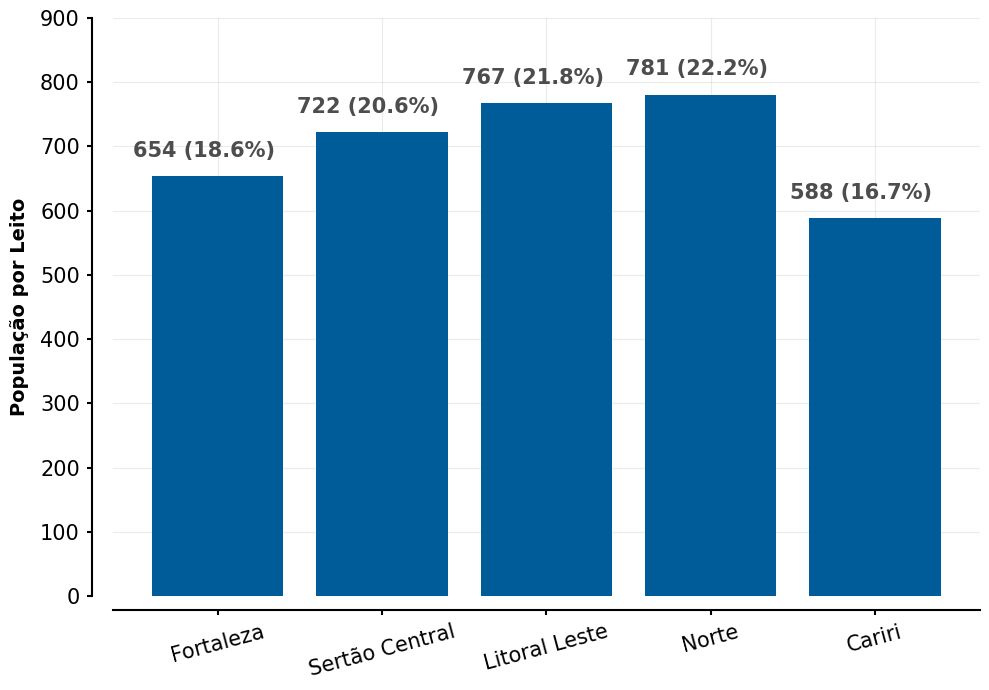

In [16]:
fig, ax = plt.subplots(1, figsize=(10,7.))

for i in ['left', 'right', 'bottom', 'top']:
    ax.spines[i].set_linewidth(1.5)

for axis in [ax]:
    axis.spines['top'].set_linewidth(0)
    axis.spines['right'].set_linewidth(0)
    axis.spines['left'].set_position(('outward', 15))
    axis.spines['bottom'].set_position(('outward', 10))
    axis.grid(alpha=0.25, zorder=0)

    axis.tick_params(direction='out', width=1.5, labelsize=15, pad=5)

ax.bar(leitos_per_macro["MACRO_ID"], leitos_per_macro["POPPLEITO"], zorder=2, color="#005c99")
#ax_sel.bar(raca_count_sel[col_nm], raca_count_sel["count"], zorder=2, color="#005c99")
#ax.barh(idade_ms_fem.index, -1*idade_ms_fem, label="Feminino", zorder=2)

ax.tick_params(direction='out', width=1.5, labelsize=15, pad=5)
#ax.yaxis.set_tick_params(labelsize=15)
#ax.yaxis.set_tick_params(width=0)
ax.set_ylim([0, 900])

ax.grid(alpha=0.25, zorder=0)
for axis in [ax]:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axis.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    axis.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(abs(x)), ',').replace(",", ".")))
#ax.legend(prop={'size':14}, loc=4)

serie_data = leitos_per_macro
serie_sum = serie_data['POPPLEITO'].sum()
for idx in range(len(serie_data['POPPLEITO'])):
    porc = (serie_data['POPPLEITO'].iloc[idx]/serie_sum)*100
    ax.text(y=serie_data['POPPLEITO'].iloc[idx]+40, x=idx+.35, s=f'{serie_data["POPPLEITO"].iloc[idx]:,.0f} ({porc:.1f}%)'.replace(",","."), 
                ha='right', va='center', weight='bold', fontsize=15, color="#4d4d4d")
    
ax.set_ylabel("População por Leito", fontsize=14, weight='bold', labelpad=8)
ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=15)
fig.tight_layout()
#ax.set_title("Todos os óbitos", weight='bold', fontsize=15)
fig.savefig(os.path.join(figpath, "stats_macro_original_pop_por_leito.png"), dpi=200, bbox_inches='tight')

## **3. Geodesic distances to health services (Macros)** 

In [17]:
# -- load geo
geodata_df = gpd.read_parquet(os.path.join(geopath, "ce_geodata.parquet"))

# -- create the two datasets
# -- one: geolocation of health units who genereated an AIH during 2018-2023 (this period can be flexible)
# -- two: geolocation of census units with the number of population contained in each unit
cnes_df = pd.read_parquet(os.path.join(cnespath, "cnes_st_0801_2312.parquet"))
cnes_df = cnes_df[["CNES", "CODUFMUN", "latitude", "longitude"]]
cnes_df = cnes_df.merge(geodata_df[["GEOCOD6", "MACRO_ID"]], left_on="CODUFMUN", right_on="GEOCOD6", how="left").drop("GEOCOD6", axis=1)

pop_census_df = gpd.read_parquet(os.path.join(geopath, "censo2010_pop_setores.parquet"))
pop_census_df1 = pop_census_df[["CD_GEOCODI", "CD_GEOCODM", "geometry", "Pop_setor_censo2010"]].copy()
pop_census_df1["GEOCOD6"] = pop_census_df1["CD_GEOCODM"].apply(lambda x: x[:6])
pop_census_df1 = pop_census_df1.merge(geodata_df[["GEOCOD6", "MACRO_ID"]], on="GEOCOD6", how="left")
pop_census_df1['centroid'] = pop_census_df1['geometry'].centroid
pop_census_df1 = pop_census_df1.drop('geometry', axis=1).rename({'centroid': 'geometry'}, axis=1).set_geometry('geometry')
pop_census_df1 = pop_census_df1.to_crs(epsg=29194).copy()

# -- the city-hospital bipartite network can provide which health units are actually relevant for analysis (generated at least one AIH during the period chosen)
graph = nx.read_gml(os.path.join(gmlpath, "novo_completo", "citytohospitalnet_agg_1801_2306.gml"))

# -- filter only the relevant health units
valid_cnes = [ graph.nodes[v]['code'] for v in graph.nodes() if graph.nodes[v]['type']=='hospital' and graph.degree(v)>0 ]
valid_cnes_df = cnes_df[cnes_df["CNES"].isin(valid_cnes)]

# -- define the geometry of the health units
valid_cnes_df["geometry"] = gpd.points_from_xy(valid_cnes_df.longitude, valid_cnes_df.latitude)
valid_cnes_df = gpd.GeoDataFrame(valid_cnes_df, geometry='geometry', crs="EPSG:4674")
# -- health units in projection for meters
valid_cnes_df1 = valid_cnes_df.to_crs(epsg=29194).copy()
#valid_cnes_df1 = valid_cnes_df.copy()

C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_21676\1632097510.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pop_census_df1['centroid'] = pop_census_df1['geometry'].centroid
C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_21676\1632097510.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_cnes_df["geometry"] = gpd.points_from_xy(valid_cnes_df.longitude, valid_cnes_df.latitude)


In [18]:
def get_distances_macro(macro_id, valid_cnes_df, pop_setor):
    '''
        consider the population of setor
    '''
    subset_cnes = valid_cnes_df1[valid_cnes_df["MACRO_ID"]==macro_id]
    subset_pop_setor = pop_setor[pop_setor["MACRO_ID"]==macro_id]
                                 
    #macro_distances = []
    #for index in range(subset_cnes.shape[0]):
    #    current_point_cnes = subset_cnes.geometry.iloc[index]
    #    lst_dist = (subset_pop_setor.distance(current_point_cnes)/1000)*subset_pop_setor["Pop_setor_censo2010"].apply(lambda x: np.ones(int(x)) if pd.notna(x) else np.array([]))
    #    macro_distances += lst_dist.apply(list).sum()

    macro_distances = subset_cnes.geometry.apply(lambda g: subset_pop_setor.distance(g)/1000).values.flatten() # km
    return macro_distances

macrodist1 = get_distances_macro(1, valid_cnes_df=valid_cnes_df1, pop_setor=pop_census_df1)
macrodist2 = get_distances_macro(2, valid_cnes_df=valid_cnes_df1, pop_setor=pop_census_df1)
macrodist3 = get_distances_macro(3, valid_cnes_df=valid_cnes_df1, pop_setor=pop_census_df1)
macrodist4 = get_distances_macro(4, valid_cnes_df=valid_cnes_df1, pop_setor=pop_census_df1)
macrodist5 = get_distances_macro(5, valid_cnes_df=valid_cnes_df1, pop_setor=pop_census_df1)

bins = np.arange(0,305,10)
va1, _ = np.histogram(macrodist1, bins)
va2, _ = np.histogram(macrodist2, bins)
va3, _ = np.histogram(macrodist3, bins)
va4, _ = np.histogram(macrodist4, bins)
va5, _ = np.histogram(macrodist5, bins)


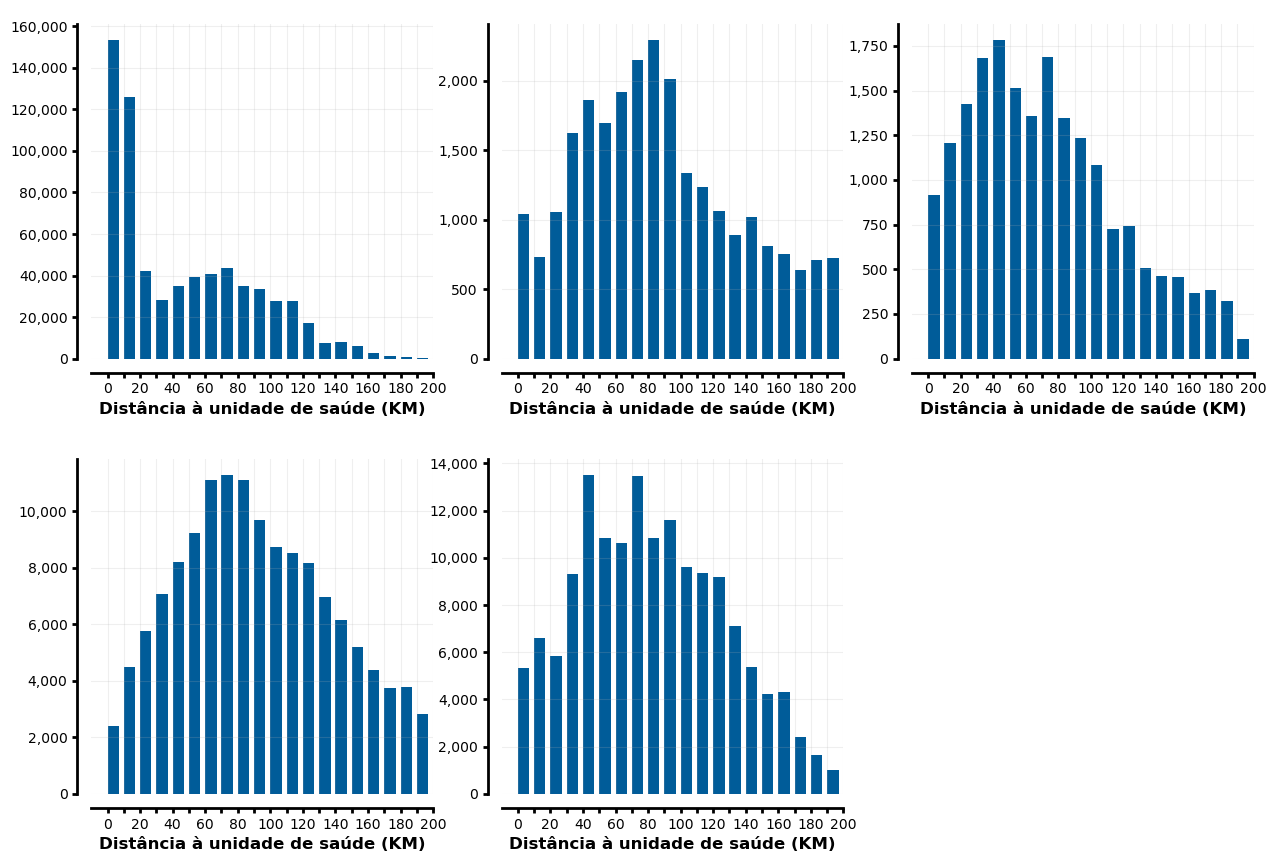

In [22]:
fig, AX = plt.subplots(2, 3, figsize=(15,10))

bar_width = 7
AX[0,0].bar(height=va1, x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[0,1].bar(height=va2, x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[0,2].bar(height=va3, x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[1,0].bar(height=va4, x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[1,1].bar(height=va5, x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[1,2].axis('off')

for i in range(2):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)
        AX[i,j].set_xticks([n for n in bins[:-1]])
        AX[i,j].set_xticklabels([ f'{x:0.0f}' if x%20==0 else '' for x in bins[:-1] ])
        AX[i,j].set_xlim([-10,200])
        AX[i,j].set_xlabel("Distância à unidade de saúde (KM)", fontsize=12, weight='bold')

#AX[0,0].set_ylabel("Cobertura populacional\nda macrorregião", fontsize=12, weight='bold', labelpad=8)
#AX[1,0].set_ylabel("Cobertura populacional\nda macrorregião", fontsize=12, weight='bold', labelpad=8)
fig.subplots_adjust(hspace=0.3)

fig.savefig(os.path.join(figpath, "stats_macro_original_distancias_unisaude.png"), dpi=200, bbox_inches='tight')

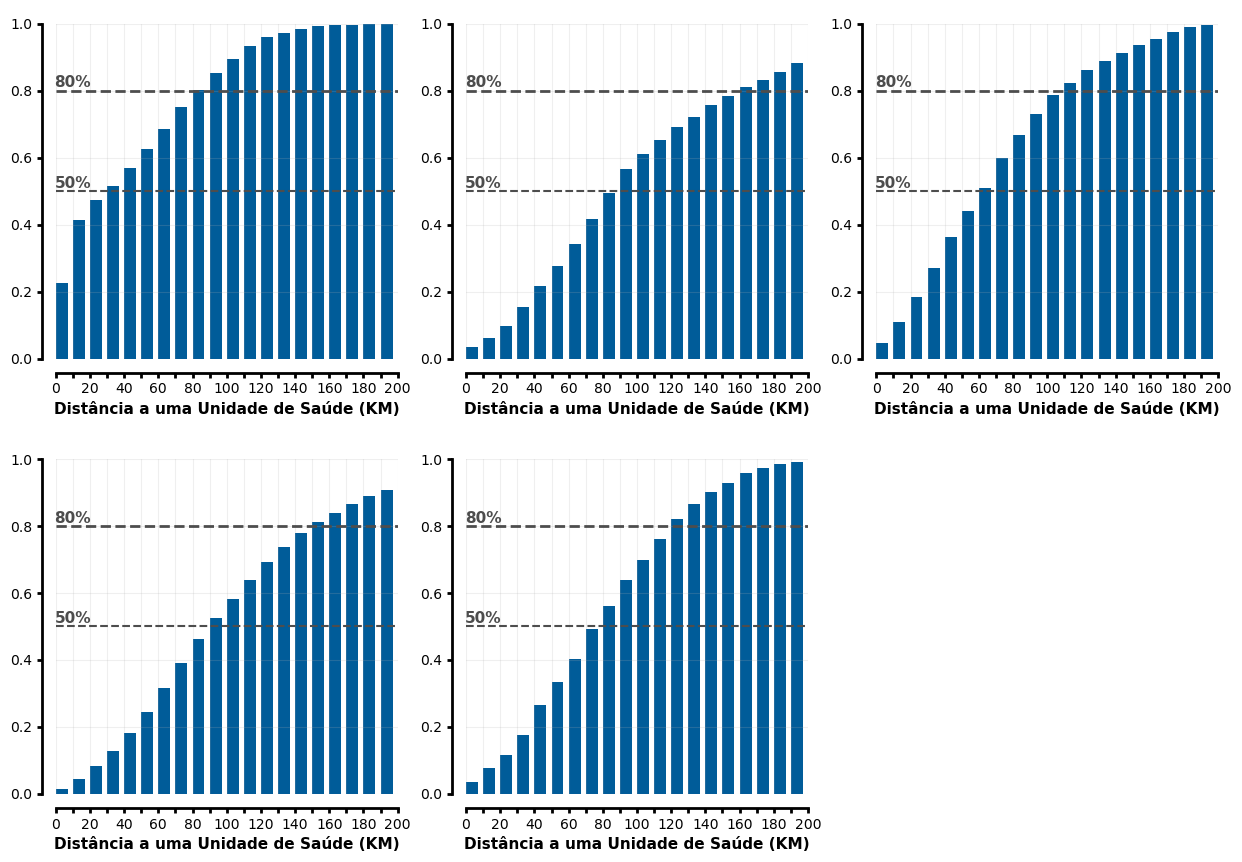

In [23]:
fig, AX = plt.subplots(2, 3, figsize=(15,10))

bar_width = 7
AX[0,0].bar(height=va1.cumsum()/va1.sum(), x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[0,1].bar(height=va2.cumsum()/va2.sum(), x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[0,2].bar(height=va3.cumsum()/va3.sum(), x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[1,0].bar(height=va4.cumsum()/va4.sum(), x=bins[:-1], width=bar_width, align='edge', color="#005c99")
AX[1,1].bar(height=va5.cumsum()/va5.sum(), x=bins[:-1], width=bar_width, align='edge', color="#005c99")

for i in range(2):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        #AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        #AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)
        AX[i,j].set_xticks([n for n in bins[:-1]])
        AX[i,j].set_xticklabels([ f'{x:0.0f}' if x%20==0 else '' for x in bins[:-1] ])
        AX[i,j].set_xlim([0,200])
        AX[i,j].set_ylim([0,1])
        if i==1 and j==2:
            continue
        AX[i,j].axhline(y=0.8, ls="--", color="#4d4d4d", lw=2)
        AX[i,j].axhline(y=0.5, ls="--", color="#4d4d4d", lw=1.5)
        AX[i,j].text(x=10, y=0.81, s='80%', fontsize=11, weight='bold', ha='center', color='#4d4d4d')
        AX[i,j].text(x=10, y=0.51, s='50%', fontsize=11, weight='bold', ha='center', color='#4d4d4d')
        AX[i,j].set_xlabel("Distância a uma Unidade de Saúde (KM)", fontsize=11, weight='bold')

AX[1,2].axis('off')
#AX[0,0].set_ylabel("Fração de Setores Censitários", fontsize=11, weight='bold', labelpad=8)

fig.subplots_adjust(hspace=0.3)
fig.savefig(os.path.join(figpath, "stats_macro_original_distancias_unisaude_acum.png"), dpi=200, bbox_inches='tight')

In [25]:
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300])

## **4. CCA for hospitals**

In [185]:
pop_censo_setores_df = gpd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cca_health_setores.parquet"))

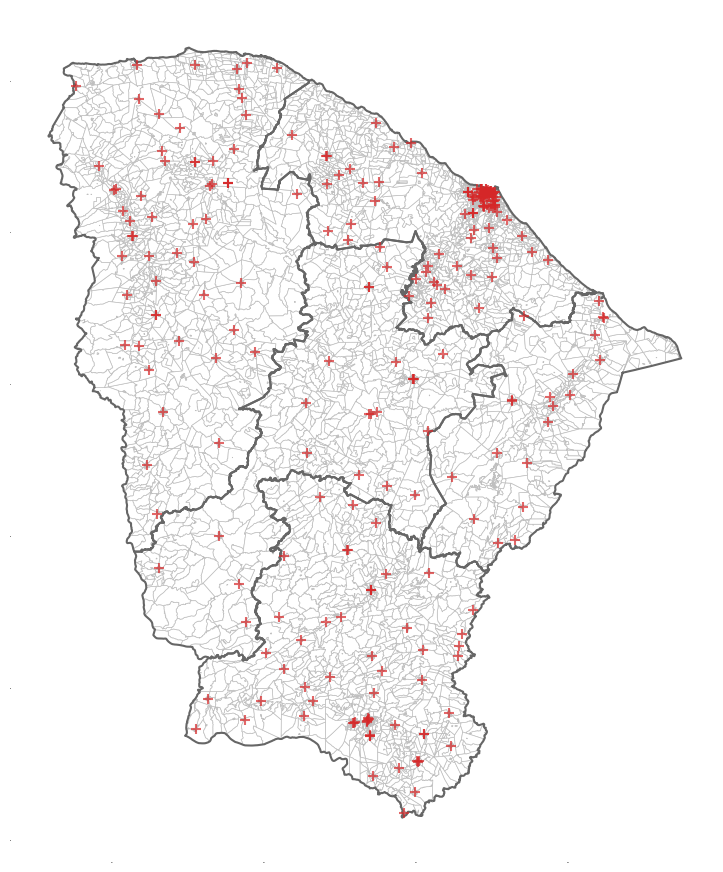

In [186]:
# -- geometry ceará
fig1, ax1 = plt.subplots(1, figsize=(13,11))

pop_censo_setores_df.plot(ax=ax1, color="#ffffff", edgecolor="#bfbfbf", linewidth=0.5)
macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax1, color="none", edgecolor="#666666", linewidth=1.5)
#macro_df[macro_df["MACRO_ID"]==1].plot(ax=ax1, color="none", edgecolor="#ef476f", linewidth=1.5)

valid_cnes_df.plot(ax=ax1, markersize=42, marker='+', alpha=0.7, color="tab:red")

for i in ['left', 'right', 'top', 'bottom']:
    ax1.spines[i].set_linewidth(0)

ax1.tick_params(which='both', length=0, labelsize=0)


# -- node color
cmap_macro_str = {'1': "#ef476f", '2': "#ffd166", '3': "#06d6a0", '4': "#118ab2", '5': "#073b4c"}
cmap_macro_str = {'1': "#ef476f", '2': "#ffb300", '3': "#04ae81", '4': "#118ab2", '5': "#073b4c"}

# -- edge color
cmap_edge_color = {'1': "#ef476f", '2': "#ffd166", '3': "#06d6a0", '4': "#118ab2", '5': "#073b4c", "-1": "#9c9c9c"}
cmap_edge_color = {'1': "#ef476f", '2': "#ffb300", '3': "#04ae81", '4': "#118ab2", '5': "#073b4c", "-1": "#404040"}

fig1.savefig(os.path.join(figpath, "hospitals_2018_2306_cca_base.png"), dpi=200, bbox_inches='tight')

**Algorithm**

In [118]:
pop_censo_setores_df = gpd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cca_health_setores.parquet"))
leitos_cca_hospitais_df = gpd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cca_health_hospitais.parquet"))

In [119]:
l = 5
quant_leitos_cca = leitos_cca_hospitais_df.groupby(f"cca_health_module_l{l}")["NUMLEITOS_TOTAL"].sum().reset_index()
map_leitos_cca = dict(zip(quant_leitos_cca[f"cca_health_module_l{l}"], quant_leitos_cca["NUMLEITOS_TOTAL"]))
leitos_cca_hospitais_df[f"NUMLEITOS_TOTAL_CCA_L{l}"] = leitos_cca_hospitais_df[f"cca_health_module_l{l}"].map(map_leitos_cca)

In [120]:
leitos_cca_hospitais_df.head()

CNES  latitude  longitude                    geometry  \
0    9999310 -4.970753 -39.014854  POINT (-39.01485 -4.97075)   
611  9675787 -3.795548 -38.492201  POINT (-38.49220 -3.79555)   
613  9672427 -5.089599 -38.121126  POINT (-38.12113 -5.08960)   
635  9658815 -3.732426 -38.511244  POINT (-38.51124 -3.73243)   
908  9526293 -3.771279 -38.474536  POINT (-38.47454 -3.77128)   

     cca_health_module_l5  cca_health_module_l10  cca_health_module_l15  \
0                      22                     22                     22   
611                     0                      0                      0   
613                   267                    123                    122   
635                     0                      0                      0   
908                     0                      0                      0   

     cca_health_module_l20  cca_health_module_l25  NUMLEITOS_TOTAL  \
0                       17                     17              0.0   
611                      0                      0              2.0   
613                     14                     44            142.0   
635                      0                      0              4.0   
908                      0                      0             25.0   

     NUMLEITOS_TOTAL_CCA_L5  
0                     206.0  
611                  6569.0  
613                   142.0  
635                  6569.0  
908                  6569.0

In [121]:
pop_cca_valid = pop_censo_setores_df[pop_censo_setores_df[f"cca_health_module_l{l}"]!=-1]
quant_pop_cca = pop_cca_valid.groupby(f"cca_health_module_l{l}")["Pop_setor_censo2010"].sum().reset_index()
map_pop_cca = dict(zip(quant_pop_cca[f"cca_health_module_l{l}"], quant_pop_cca["Pop_setor_censo2010"]))
pop_censo_setores_df[f"POP_TOTAL_CCA_L{l}"] = pop_censo_setores_df[f"cca_health_module_l{l}"].map(map_pop_cca)

In [122]:
pop_censo_setores_df = pop_censo_setores_df.merge(leitos_cca_hospitais_df[[f"cca_health_module_l{l}", f"NUMLEITOS_TOTAL_CCA_L{l}"]], on=f"cca_health_module_l{l}", how="left")
pop_censo_setores_df["População por leitos"] = (pop_censo_setores_df[f"POP_TOTAL_CCA_L{l}"]/pop_censo_setores_df[f"NUMLEITOS_TOTAL_CCA_L{l}"])#.fillna(0)

In [123]:
pop_censo_setores_df.head()

ID       CD_GEOCODI    TIPO CD_GEOCODB NM_BAIRRO   CD_GEOCODS NM_SUBDIST  \
0  9098  230030925000003   RURAL       None      None  23003092500       None   
1  9099  230030925000004   RURAL       None      None  23003092500       None   
2  9100  230030925000005   RURAL       None      None  23003092500       None   
3  9101  230030925000006   RURAL       None      None  23003092500       None   
4  9102  230030925000007  URBANO       None      None  23003092500       None   

  CD_GEOCODD     NM_DISTRIT CD_GEOCODM  ...        Cod_setor  \
0  230030925  SANTA FELÍCIA    2300309  ...  230030925000003   
1  230030925  SANTA FELÍCIA    2300309  ...  230030925000004   
2  230030925  SANTA FELÍCIA    2300309  ...  230030925000005   
3  230030925  SANTA FELÍCIA    2300309  ...  230030925000006   
4  230030925  SANTA FELÍCIA    2300309  ...  230030925000007   

  Pop_setor_censo2010 cca_health_module_l5 cca_health_module_l10  \
0               377.0                   -1                    -1   
1               199.0                   -1                    -1   
2               636.0                   -1                    -1   
3               437.0                   -1                    -1   
4               409.0                   -1                    -1   

  cca_health_module_l15  cca_health_module_l20  cca_health_module_l25  \
0                    -1                     25                     24   
1                    25                     25                     25   
2                    -1                     -1                     24   
3                    -1                     -1                     25   
4                    -1                     24                     24   

   POP_TOTAL_CCA_L5  NUMLEITOS_TOTAL_CCA_L5  População por leitos  
0               NaN                     NaN                   NaN  
1               NaN                     NaN                   NaN  
2               NaN                     NaN                   NaN  
3               NaN                     NaN                   NaN  
4               NaN                     NaN                   NaN  

[5 rows x 24 columns]

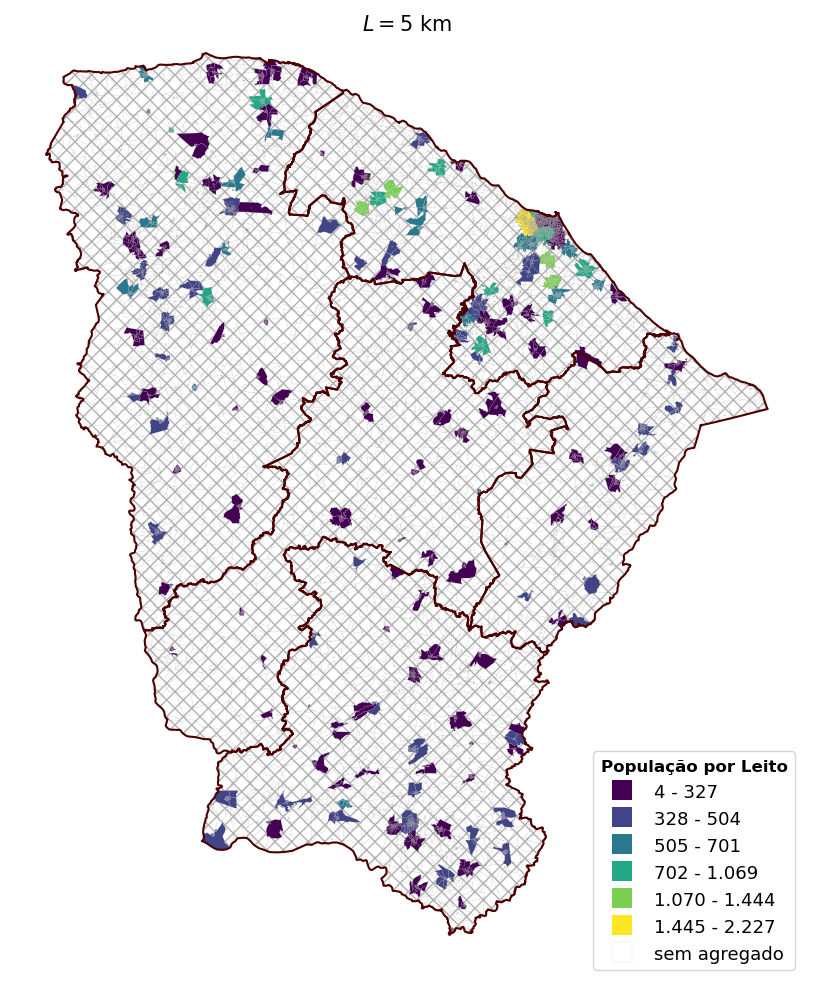

In [124]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, ax_mapa = plt.subplots(1,1, figsize=(15.5,10))

#cmap_range = colors = plt.cm.reds(np.linspace(0,1,18)) # -- colormap for the ranking

pop_censo_setores_df.plot(ax=ax_mapa, column='População por leitos', edgecolor="#b3b2b2", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="viridis",
             linewidth=0.1,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "xx",
                 "label": 'sem agregado',
                 'alpha': 0.4
             })

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax_mapa, color="none", edgecolor="#4d0000", linewidth=1.5)

ax_mapa.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)

for axis in [ax_mapa]:
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(15)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 13}, loc=4, title='População por Leito', title_fontproperties={'weight': 'bold', 'size': 12})

fig_mapa.tight_layout()
fig_mapa.suptitle(rf"$L = {l}$ km", fontsize=15)
fig_mapa.savefig(os.path.join(figpath, f"pop_por_leitos_cca_cluster_l{l}km.png"), dpi=250, bbox_inches='tight')

## **5. Time series of hospitals and hospital beds per macro**

In [10]:
macro_names_original = {1: 'Fortaleza', 2: 'Sertão Central', 3: 'Litoral Leste', 4: 'Norte', 5: 'Cariri'}
macro_names_proposal = {1: 'Grande Fortaleza - Maciço de Baturité',
                        2: 'Litoral Oeste - Vale do Curu - Litoral Norte',
                        3: 'Cariri', 4: 'Centro Sul', 
                        5: 'Sertão Central', 6: 'Litoral Leste - Jaguaribe',
                        7: 'Sertão dos Inhamus - Crateús',
                        8: 'Serra da Ibiapaba - Sertão de Sobral'}

In [6]:
macro_original_leitos = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "timeserie_macro_original_beds.parquet"))
macro_proposal_leitos = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "timeserie_macro_proposal_beds.parquet"))

macro_original_leitos.head()

1                                            2                     \
     period macro_leitos_princ macro_leitos_todos period macro_leitos_princ   
0801   0801             6406.0             9918.0   0801              499.0   
0802   0802             6450.0             9962.0   0802              499.0   
0803   0803             6450.0             9971.0   0803              499.0   
0804   0804             6611.0            10148.0   0804              499.0   
0805   0805             6632.0            10192.0   0805              499.0   

                             3                                            4  \
     macro_leitos_todos period macro_leitos_princ macro_leitos_todos period   
0801              882.0   0801              546.0              901.0   0801   
0802              882.0   0802              546.0              901.0   0802   
0803              884.0   0803              546.0              908.0   0803   
0804              884.0   0804              552.0              914.0   0804   
0805              884.0   0805              552.0              914.0   0805   

                                                5                     \
     macro_leitos_princ macro_leitos_todos period macro_leitos_princ   
0801             1389.0             2414.0   0801             2180.0   
0802             1389.0             2412.0   0802             2186.0   
0803             1389.0             2418.0   0803             2192.0   
0804             1362.0             2388.0   0804             2189.0   
0805             1365.0             2391.0   0805             2184.0   

                         
     macro_leitos_todos  
0801             3362.0  
0802             3368.0  
0803             3383.0  
0804             3371.0  
0805             3367.0

### **0.1 Macro original - Number of Hospital beds**

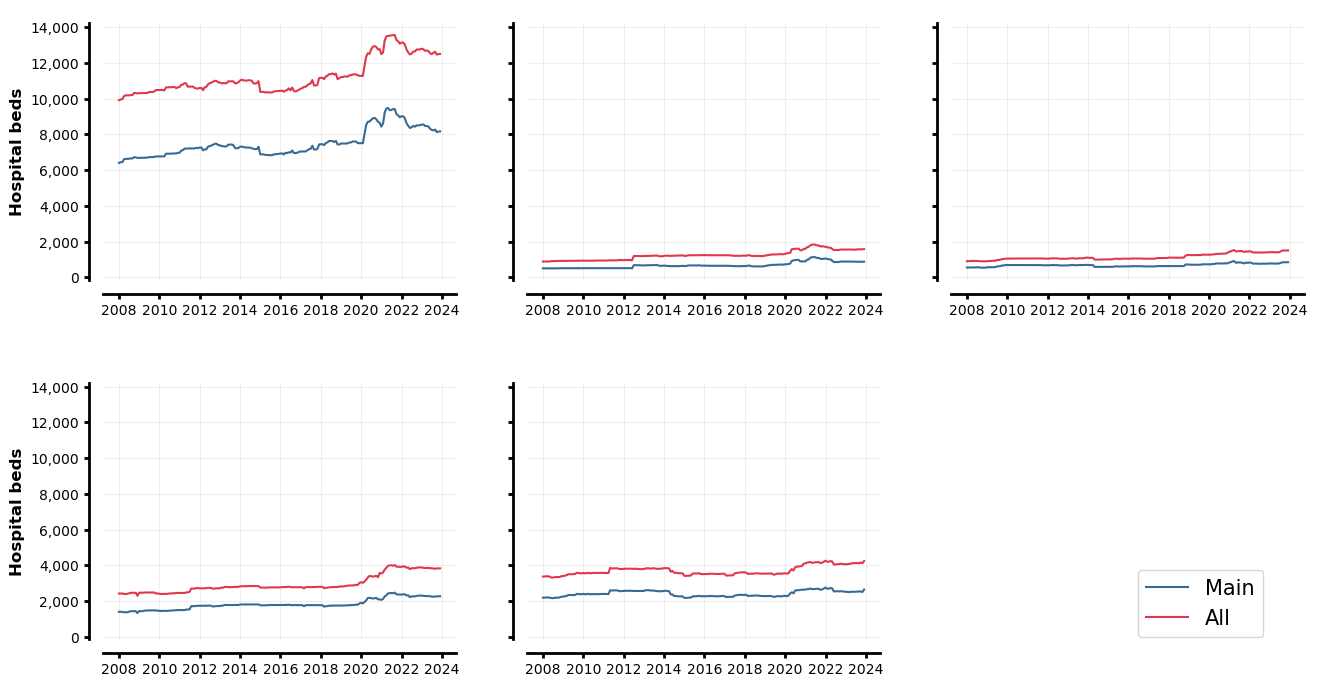

In [11]:
fig, AX = plt.subplots(2,3, figsize=(15.5,8), sharey=True)

xvalues = macro_original_leitos[1, 'period'].tolist()
xvalues = [ dt.datetime(2000+int(x[:2]), int(x[2:]), 1) for x in xvalues ]

#AX[0,0].set_title(macro_dict[1].replace("Superintendência Regional de Saúde", "SRS"))
lineprinc, = AX[0,0].plot(xvalues, macro_original_leitos[1, 'macro_leitos_princ'], color="#396a93")
linetodos, = AX[0,0].plot(xvalues, macro_original_leitos[1, 'macro_leitos_todos'], color="#e1374b")

AX[0,1].plot(xvalues, macro_original_leitos[2, 'macro_leitos_princ'], color="#396a93")
AX[0,1].plot(xvalues, macro_original_leitos[2, 'macro_leitos_todos'], color="#e1374b")

AX[0,2].plot(xvalues, macro_original_leitos[3, 'macro_leitos_princ'], color="#396a93")
AX[0,2].plot(xvalues, macro_original_leitos[3, 'macro_leitos_todos'], color="#e1374b")

AX[1,0].plot(xvalues, macro_original_leitos[4, 'macro_leitos_princ'], color="#396a93")
AX[1,0].plot(xvalues, macro_original_leitos[4, 'macro_leitos_todos'], color="#e1374b")

AX[1,1].plot(xvalues, macro_original_leitos[5, 'macro_leitos_princ'], color="#396a93")
AX[1,1].plot(xvalues, macro_original_leitos[5, 'macro_leitos_todos'], color="#e1374b")

AX[1,2].axis('off')

fig.legend([lineprinc, linetodos], ['Main', 'All'], loc=4, bbox_to_anchor=((0.88,0.1)), prop={'size':15})

#AX[0,0].set_yscale('log')
for i in range(2):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)

AX[0,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')
AX[1,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')

fig.subplots_adjust(hspace=0.4)

### **0.2 Macro Proposal - Number of Hospital beds**

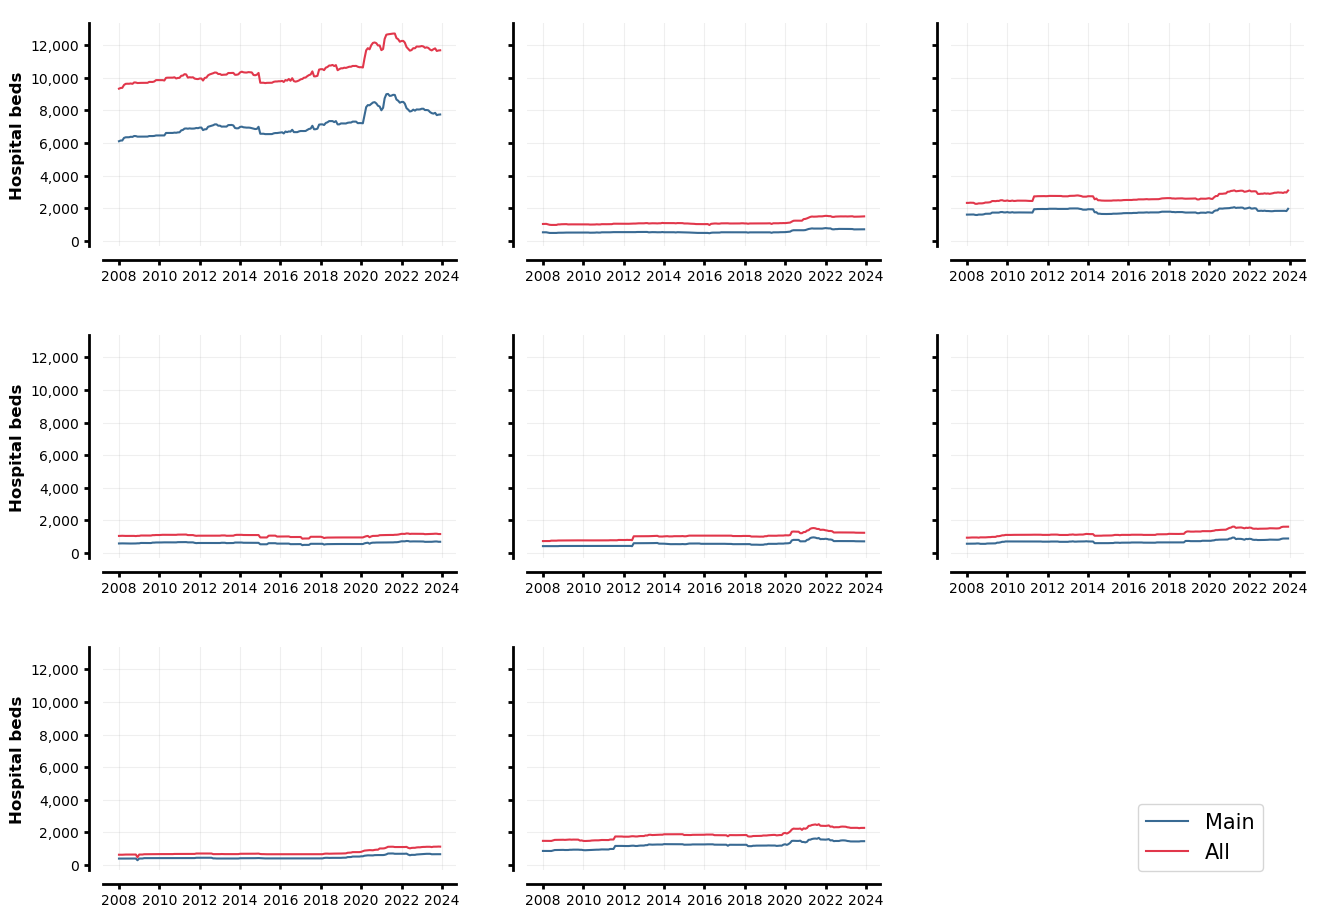

In [12]:
fig, AX = plt.subplots(3,3, figsize=(15.5,11), sharey=True)

xvalues = macro_proposal_leitos[1, 'period'].tolist()
xvalues = [ dt.datetime(2000+int(x[:2]), int(x[2:]), 1) for x in xvalues ]

#AX[0,0].set_title(macro_dict[1].replace("Superintendência Regional de Saúde", "SRS"))
lineprinc, = AX[0,0].plot(xvalues, macro_proposal_leitos[1, 'macro_leitos_princ'], color="#396a93")
linetodos, = AX[0,0].plot(xvalues, macro_proposal_leitos[1, 'macro_leitos_todos'], color="#e1374b")

AX[0,1].plot(xvalues, macro_proposal_leitos[2, 'macro_leitos_princ'], color="#396a93")
AX[0,1].plot(xvalues, macro_proposal_leitos[2, 'macro_leitos_todos'], color="#e1374b")

AX[0,2].plot(xvalues, macro_proposal_leitos[3, 'macro_leitos_princ'], color="#396a93")
AX[0,2].plot(xvalues, macro_proposal_leitos[3, 'macro_leitos_todos'], color="#e1374b")

AX[1,0].plot(xvalues, macro_proposal_leitos[4, 'macro_leitos_princ'], color="#396a93")
AX[1,0].plot(xvalues, macro_proposal_leitos[4, 'macro_leitos_todos'], color="#e1374b")

AX[1,1].plot(xvalues, macro_proposal_leitos[5, 'macro_leitos_princ'], color="#396a93")
AX[1,1].plot(xvalues, macro_proposal_leitos[5, 'macro_leitos_todos'], color="#e1374b")

AX[1,2].plot(xvalues, macro_proposal_leitos[6, 'macro_leitos_princ'], color="#396a93")
AX[1,2].plot(xvalues, macro_proposal_leitos[6, 'macro_leitos_todos'], color="#e1374b")

AX[2,0].plot(xvalues, macro_proposal_leitos[7, 'macro_leitos_princ'], color="#396a93")
AX[2,0].plot(xvalues, macro_proposal_leitos[7, 'macro_leitos_todos'], color="#e1374b")

AX[2,1].plot(xvalues, macro_proposal_leitos[8, 'macro_leitos_princ'], color="#396a93")
AX[2,1].plot(xvalues, macro_proposal_leitos[8, 'macro_leitos_todos'], color="#e1374b")

AX[2,2].axis('off')

fig.legend([lineprinc, linetodos], ['Main', 'All'], loc=4, bbox_to_anchor=((0.88,0.1)), prop={'size':15})

for i in range(3):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)

AX[0,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')
AX[1,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')
AX[2,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')

fig.subplots_adjust(hspace=0.4)

## **1. Between cities flux networks**

In [30]:
# -- load geo
netsuffix = "agg_2001_2012"
geodata_df = gpd.read_parquet(os.path.join(gmlpath, "dados_for_plot", f"geoforplot_{netsuffix}.parquet"))
geodata_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GEOCOD7               184 non-null    object  
 1   NM_MUNICIP            184 non-null    object  
 2   GEOCOD6               184 non-null    object  
 3   MACRO_ID              184 non-null    int64   
 4   CRES_ID               184 non-null    int64   
 5   geometry_municip      184 non-null    geometry
 6   MACRO_NOME            184 non-null    object  
 7   geometry_macro        184 non-null    geometry
 8   geometry_cres         184 non-null    geometry
 9   MACRO_ID_PROPOSAL     184 non-null    int64   
 10  municip_lon           184 non-null    float64 
 11  municip_lat           184 non-null    float64 
 12  2010                  184 non-null    float64 
 13  2011                  184 non-null    float64 
 14  2012                  184 non-null    float64 
 15

### **1.1 Some maps**

#### **Current macro**

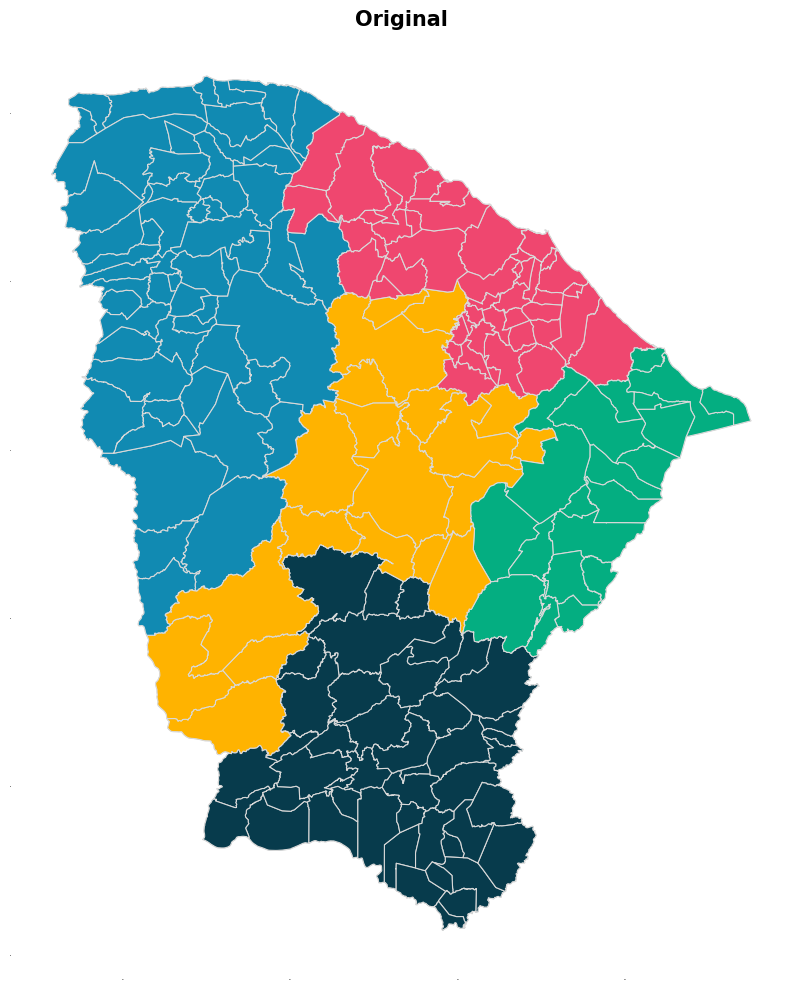

In [31]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["MACRO_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Original", fontsize=15, weight='bold')

fig_new.tight_layout()
fig_new.savefig(os.path.join(basepath, "original.png"), dpi=250, bbox_inches='tight')

#### **Proposal for macro**

KeyError: 'MACRO_PROPOSAL_COLOR'

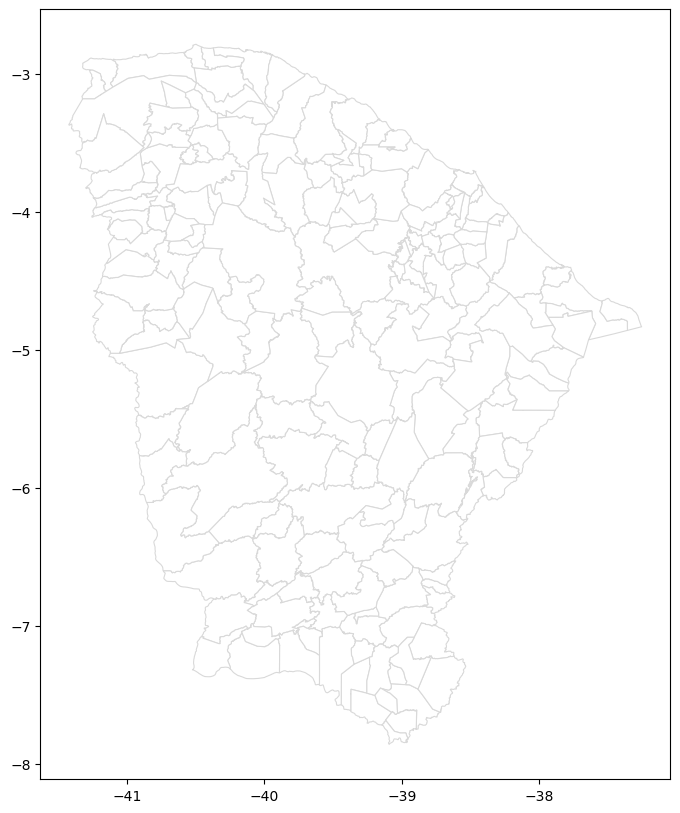

In [32]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["MACRO_PROPOSAL_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Proposal", fontsize=16, weight='bold')

fig_new.tight_layout()

#### **Infomap**

#073b4c


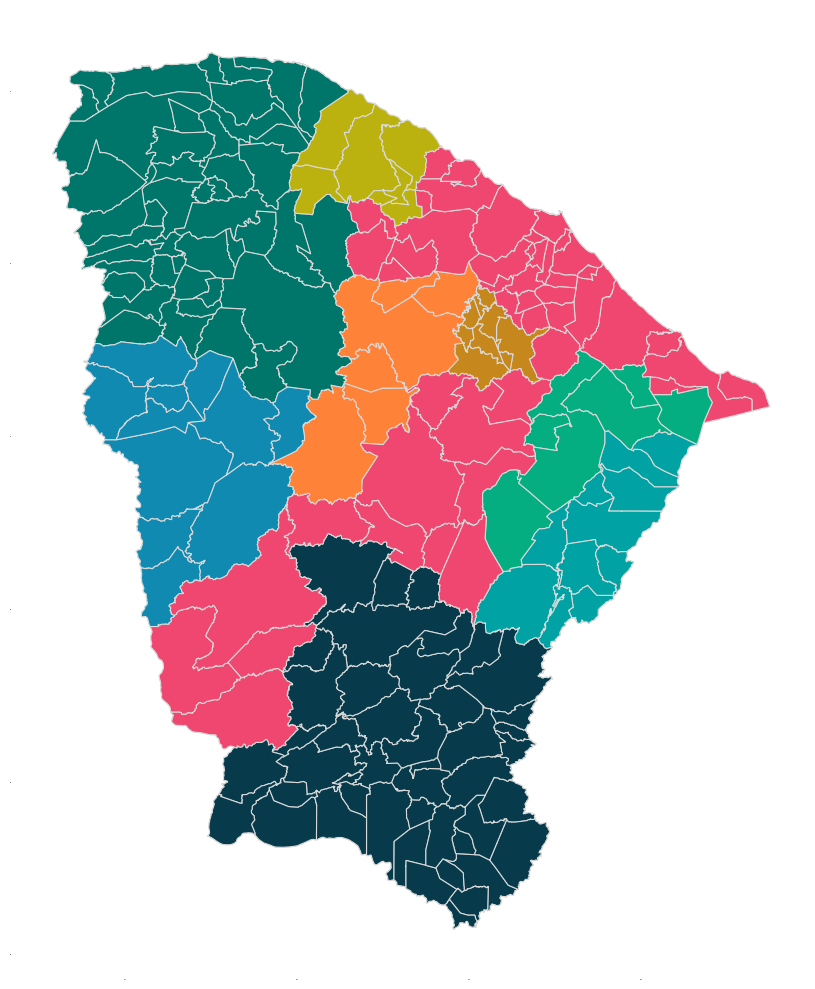

In [33]:
# -- fix abaiara infomap module
right_color = geodata_df[geodata_df["NM_MUNICIP"]=="JUAZEIRO DO NORTE"]["INFOMAP_COUNT_COLOR"].iat[0]
geodata_df["INFOMAP_COUNT_COLOR"] = geodata_df[["NM_MUNICIP", "INFOMAP_COUNT_COLOR"]].apply(lambda x: right_color if x["NM_MUNICIP"]=="ABAIARA" else x["INFOMAP_COUNT_COLOR"], axis=1)
print(right_color)

# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["INFOMAP_COUNT_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

#AX.set_title("Infomap", fontsize=16, weight='bold')

fig_new.tight_layout()
#fig_new.savefig(os.path.join(basepath, "infomap.png"), dpi=250, bbox_inches='tight')


#### **Louvain**

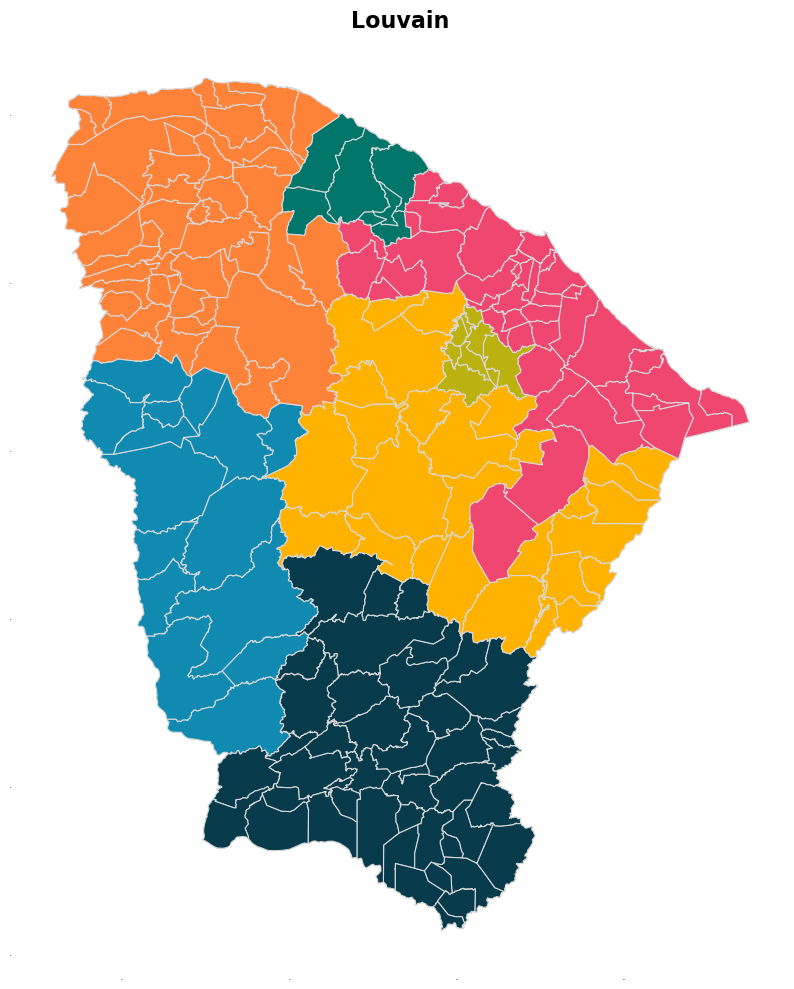

In [49]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["LOUVAIN_COUNT_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Louvain", fontsize=16, weight='bold')

fig_new.tight_layout()

### **1.2 Time fluxes between macros**

In [1]:
fnames = sorted(glob.glob(os.path.join(gmlpath, "novo_completo", "*noverlap*")))
list_of_xaxis = [ fname.split("\\")[-1].split(".")[0].split("_")[-1] for fname in fnames ]
list_of_xaxis = [ dt.date(2000+int(x[:2]), int(x[2:]), 1) for x in list_of_xaxis ]
testx = [ n for n in range(len(list_of_xaxis)) ] 

NameError: name 'glob' is not defined

In [77]:
macro_aux = geodata_df.drop_duplicates("MACRO_ID")[["MACRO_ID", "MACRO_NOME"]]
macro_original_dict = dict(zip(macro_aux["MACRO_ID"], macro_aux["MACRO_NOME"]))

with open(os.path.join(gmlpath, 'dados_for_plot', 'macro_original_fluxes.pickle'), 'rb') as handle:
    macro_flows = pickle.load(handle)

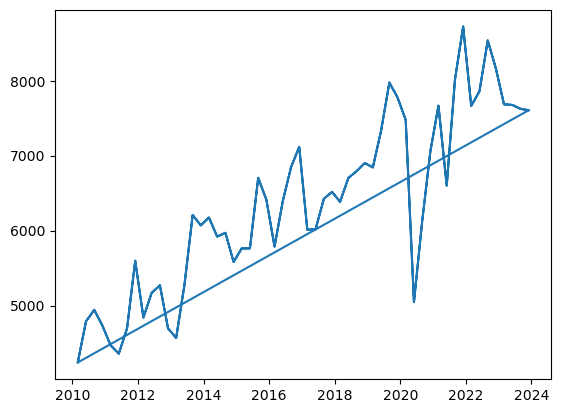

In [79]:
len(macro_flows["1"]["INCOMING"])
len(list_of_xaxis)

plt.plot(list_of_xaxis, macro_flows["1"]["INCOMING"])

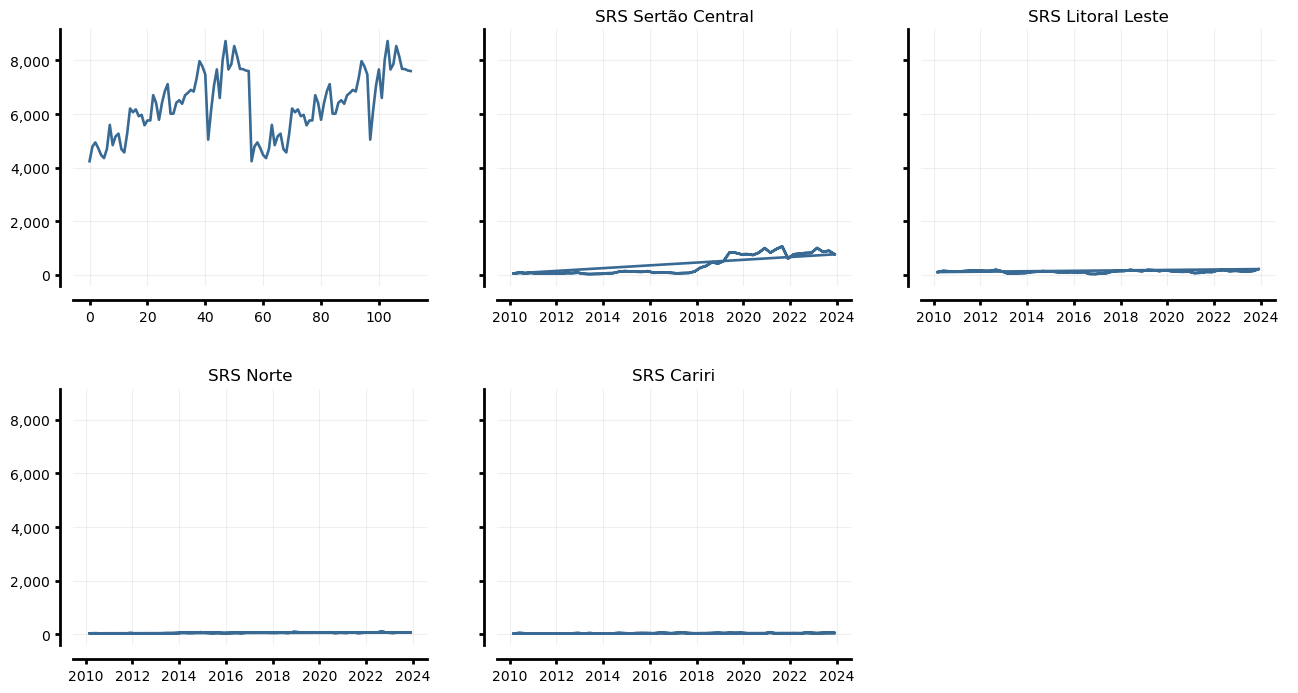

In [86]:
fig, AX = plt.subplots(2,3, figsize=(15.5,8), sharey=True)

AX[0,0].set_title(macro_original_dict[1].replace("Superintendência Regional de Saúde", "SRS"))
linein, = AX[0,0].plot(testx, macro_flows["1"]["INCOMING"], color="#396a93", lw=1.9)
lineout, = AX[0,0].plot(list_of_xaxis, macro_flows["1"]["OUTGOING"], color="#e1374b", lw=1.9)
lineins, = AX[0,0].plot(list_of_xaxis, macro_flows["1"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[0,1].set_title(macro_original_dict[2].replace("Superintendência Regional de Saúde", "SRS"))
AX[0,1].plot(testx, macro_flows["2"]["INCOMING"], color="#396a93", lw=1.9)
AX[0,1].plot(list_of_xaxis, macro_flows["2"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[0,1].plot(list_of_xaxis, macro_flows["2"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[0,2].set_title(macro_original_dict[3].replace("Superintendência Regional de Saúde", "SRS"))
AX[0,2].plot(testx, macro_flows["3"]["INCOMING"], color="#396a93", lw=1.9)
AX[0,2].plot(list_of_xaxis, macro_flows["3"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[0,2].plot(list_of_xaxis, macro_flows["3"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[1,0].set_title(macro_original_dict[4].replace("Superintendência Regional de Saúde", "SRS"))
AX[1,0].plot(testx, macro_flows["4"]["INCOMING"], color="#396a93", lw=1.9)
AX[1,0].plot(list_of_xaxis, macro_flows["4"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[1,0].plot(list_of_xaxis, macro_flows["4"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[1,1].set_title(macro_original_dict[5].replace("Superintendência Regional de Saúde", "SRS"))
AX[1,1].plot(testx, macro_flows["5"]["INCOMING"], color="#396a93", lw=1.9)
AX[1,1].plot(list_of_xaxis, macro_flows["5"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[1,1].plot(list_of_xaxis, macro_flows["5"]["INTERNAL"], color='#4d4d4d', ls="--")

fig.legend([linein, lineout, lineins], ['in-flow', 'out-flow', 'internal'], loc=4, bbox_to_anchor=((0.78,0.1)), prop={'size':15})

AX[1,2].axis('off')


for i in range(2):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)

fig.subplots_adjust(hspace=0.4)
    